In [6]:
5*(120,90)


(120, 90, 120, 90, 120, 90, 120, 90, 120, 90)

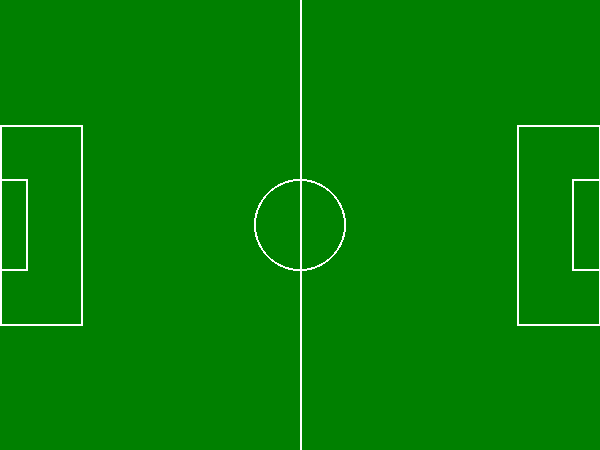

In [7]:
from gymnasium.core import RenderFrame
from PIL import Image, ImageDraw

scale = 5

width, height = 120 * scale, 90 * scale
field = Image.new("RGB", (width, height), "green")  # Green background for the field

# Use PIL's drawing module to add field lines or other details
draw = ImageDraw.Draw(field)

# Drawing center line and circle
draw.line([(width / 2, 0), (width / 2, height)], fill="white", width=2)  # Center line

center_line_radius = 9.15 * scale

draw.ellipse(xy=[
    (width / 2 - center_line_radius, height / 2 - center_line_radius),
    (width / 2 + center_line_radius, height / 2 + center_line_radius)], width=2)

outer_goal_height = 40 * scale
outer_goal_width = 16.5 * scale

inner_goal_height = 18.3 * scale
inner_goal_width = 5.5 * scale

goal_size = 7.32 * scale

# Drawing goals
draw.rectangle(xy=[
    (0, height / 2 - outer_goal_height / 2),
    (outer_goal_width, height / 2 + outer_goal_height / 2)
], width=2)

draw.rectangle(xy=[
    (0, height / 2 - inner_goal_height / 2),
    (inner_goal_width, height / 2 + inner_goal_height / 2)
], width=2)

draw.line(xy=[
    (0, height / 2 - goal_size / 2),
    (0, height / 2 + goal_size / 2),
])

draw.rectangle(xy=[
    (width - outer_goal_width, height / 2 - outer_goal_height / 2),
    (width, height / 2 + outer_goal_height / 2)
], width=2)

draw.rectangle(xy=[
    (width - inner_goal_width, height / 2 - inner_goal_height / 2),
    (width, height / 2 + inner_goal_height / 2)
], width=2)

draw.line(xy=[
    (width, height / 2 - goal_size / 2),
    (width, height / 2 + goal_size / 2),
])

field


c:\Users\Juan\anaconda3\envs\rlx\lib\site-packages\gymnasium\utils\passive_env_checker.py:295: UserWarning: WARN: Human rendering should return `None`, got <class 'PIL.Image.Image'>
  logger.warn(


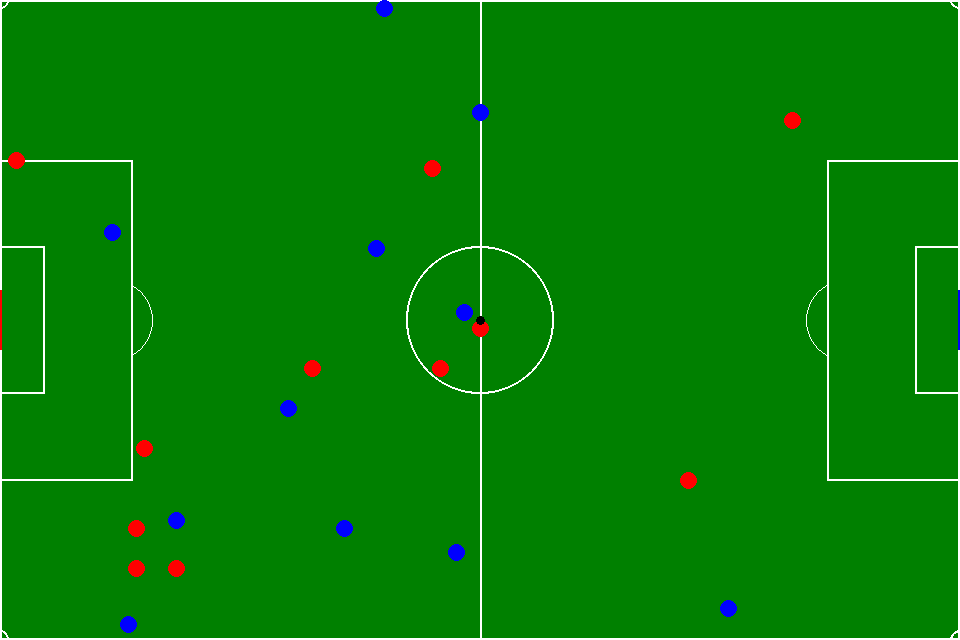

In [8]:
import gymnasium as gym
import env
from PIL import ImageChops 

env = gym.make("Soccer-v0", render_mode="human")

env.reset()

# env.step(0)

env.render()


### Observa a movimentação de cada ponto no campo
- Cada imagem mostra o ponto que moveu antes e depois simultaneamente
- Aumentar Velocity em constants.py deve facilitar visualizar a diferença

left_team player_0 move from ([57. 50.]) to ([54.3 47.3]) Indexes(0, 0)
@@@@@@@@ Aconteceu kickoff @@@@@@@@
Trocou time
right_team player_11 move from ([97.  2.]) to ([80.   4.7]) Indexes(11, 1)
Trocou time
left_team player_1 move from ([ 8. 46.]) to ([ 8.  48.7]) Indexes(1, 2)
Trocou time
right_team player_12 move from ([66. 43.]) to ([66.  45.7]) Indexes(12, 3)
Trocou time
left_team player_2 move from ([91. 20.]) to ([80.  22.7]) Indexes(2, 4)
Trocou time
right_team player_13 move from ([90.  6.]) to ([80.  6.]) Indexes(13, 5)
Trocou time
left_team player_3 move from ([14. 53.]) to ([14.  50.3]) Indexes(3, 6)
Trocou time
right_team player_14 move from ([85. 58.]) to ([80.  60.7]) Indexes(14, 7)
Trocou time
left_team player_4 move from ([103.  45.]) to ([80.  42.3]) Indexes(4, 8)
Trocou time
right_team player_15 move from ([23. 36.]) to ([23.  38.7]) Indexes(15, 9)
Trocou time
left_team player_5 move from ([69. 78.]) to ([71.7 75.3]) Indexes(5, 10)
Trocou time


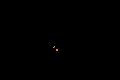

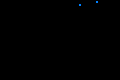

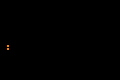

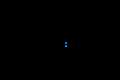

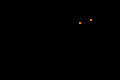

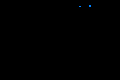

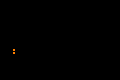

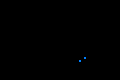

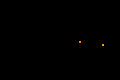

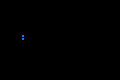

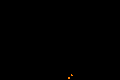

right_team player_16 move from ([84.  4.]) to ([80.   1.3]) Indexes(16, 11)
Trocou time
left_team player_6 move from ([83. 12.]) to ([80.  14.7]) Indexes(6, 12)
Trocou time
right_team player_17 move from ([41. 46.]) to ([38.3 48.7]) Indexes(17, 13)
Trocou time
left_team player_7 move from ([30. 75.]) to ([32.7 72.3]) Indexes(7, 14)
Trocou time
right_team player_18 move from ([34. 44.]) to ([36.7 41.3]) Indexes(18, 15)
Trocou time
left_team player_8 move from ([99. 41.]) to ([80.  43.7]) Indexes(8, 16)
Trocou time
right_team player_19 move from ([31. 76.]) to ([33.7 76. ]) Indexes(19, 17)
Trocou time
left_team player_9 move from ([108.  38.]) to ([80. 38.]) Indexes(9, 18)
Trocou time
right_team player_20 move from ([92. 29.]) to ([80. 29.]) Indexes(20, 19)
Trocou time
left_team player_10 move from ([82. 35.]) to ([80.  32.3]) Indexes(10, 20)
Trocou time
right_team player_21 move from ([64. 25.]) to ([64.  27.7]) Indexes(21, 21)
Trocou time


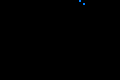

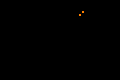

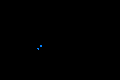

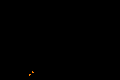

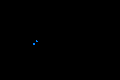

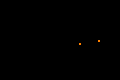

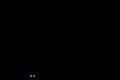

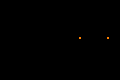

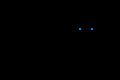

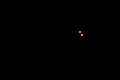

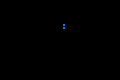

In [24]:
import gymnasium as gym
import env
import random
from PIL import ImageChops, ImageOps, Image

env = gym.make("Soccer-v0")

actions = list(range(8))

env.reset()

def img_process_pipeline(
        original_img, 
        replace_colors = False, 
        to_gray = False,
        shrink_image = True
    ): 
    modified_image = original_img

    if replace_colors:
        # Define the colors to replace (you can specify the exact RGB values)
        colors_to_replace = [(255, 0, 0), (0, 0, 255)]  # Red and Blue
        
        # Define the replacement color
        replacement_color = (255, 255, 255)  # White

        # Create a list of pixel data with colors replaced
        new_data = []

        for pixel in original_img.getdata():
            if pixel[:3] in colors_to_replace:
                new_data.append(replacement_color)
            else:
                new_data.append(pixel)

        # Create a new image with the replaced colors
        modified_image = Image.new(original_img.mode, original_img.size)
        modified_image.putdata(new_data)

    if to_gray:
        modified_image = ImageOps.grayscale(modified_image)

    if shrink_image:
        size = (120, 80)
        modified_image = modified_image.resize(size, Image.NEAREST)

    return modified_image

def images_per_team_complete_action(n = 2):
    first_image = env.render()
    images = [img_process_pipeline(first_image)]
    # display(images[0])
    for team_turn in range(n):
        for _ in range(11): # Left team action
            env.step(random.choice(actions))
            images.append(img_process_pipeline(env.render()))
            # display(images[_+1])

        differences = []
        for i in range(len(images) - 1): # Iterate over pairs of images
            image1 = images[i]
            image2 = images[i + 1] 
            diff = ImageChops.difference(image2, image1)
            differences.append(diff)

        for i in differences:
            display(i)

            pixel_data = list(i.getdata())
            total_pixel_sum = sum(sum(pixel) for pixel in pixel_data)

            if total_pixel_sum == 0:
                print("Imagem acima está toda preta, jogador não se moveu")


        # Reset images to recalculate for right team
        images = [images[-1]]

images_per_team_complete_action()


left_team player_0 move from ([95.  5.]) to ([80.  5.]) Indexes(0, 0)
left_team player_0 move from ([80.  5.]) to ([77.3  2.3]) Indexes(0, 0)
left_team player_0 move from ([77.3  2.3]) to ([74.6  0. ]) Indexes(0, 0)
left_team player_0 move from ([74.6  0. ]) to ([71.9  0. ]) Indexes(0, 0)
left_team player_0 move from ([71.9  0. ]) to ([69.2  2.7]) Indexes(0, 0)
Falhou ao tentar roubar bola
left_team player_0 move from ([69.2  2.7]) to ([66.5  5.4]) Indexes(0, 0)
left_team player_0 move from ([66.5  5.4]) to ([66.5  2.7]) Indexes(0, 0)
left_team player_0 move from ([66.5  2.7]) to ([63.8  0. ]) Indexes(0, 0)
left_team player_0 move from ([63.8  0. ]) to ([66.5  2.7]) Indexes(0, 0)


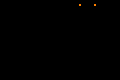

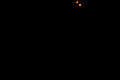

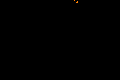

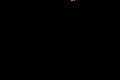

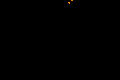

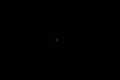

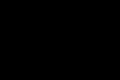

Imagem acima está toda preta, jogador não se moveu


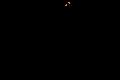

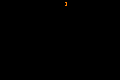

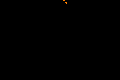

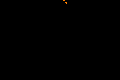

left_team player_0 move from ([66.5  2.7]) to ([69.2  5.4]) Indexes(0, 0)
left_team player_0 move from ([69.2  5.4]) to ([71.9  8.1]) Indexes(0, 0)
left_team player_0 move from ([71.9  8.1]) to ([69.2 10.8]) Indexes(0, 0)
left_team player_0 move from ([69.2 10.8]) to ([69.2 13.5]) Indexes(0, 0)
left_team player_0 move from ([69.2 13.5]) to ([69.2 10.8]) Indexes(0, 0)
left_team player_0 move from ([69.2 10.8]) to ([66.5 10.8]) Indexes(0, 0)


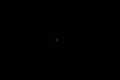

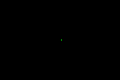

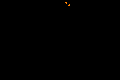

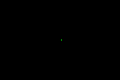

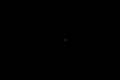

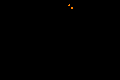

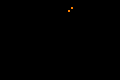

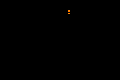

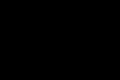

Imagem acima está toda preta, jogador não se moveu


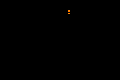

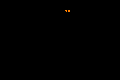

In [20]:
import gymnasium as gym
import env
import random
from PIL import ImageChops, ImageOps, Image

env = gym.make("Soccer-v0")

actions = list(range(12))

env.reset()

def img_process_pipeline(
        original_img, 
        replace_colors = False, 
        to_gray = False,
        shrink_image = True
    ): 
    modified_image = original_img

    if replace_colors:
        # Define the colors to replace (you can specify the exact RGB values)
        colors_to_replace = [(255, 0, 0), (0, 0, 255)]  # Red and Blue
        
        # Define the replacement color
        replacement_color = (255, 255, 255)  # White

        # Create a list of pixel data with colors replaced
        new_data = []

        for pixel in original_img.getdata():
            if pixel[:3] in colors_to_replace:
                new_data.append(replacement_color)
            else:
                new_data.append(pixel)

        # Create a new image with the replaced colors
        modified_image = Image.new(original_img.mode, original_img.size)
        modified_image.putdata(new_data)

    if to_gray:
        modified_image = ImageOps.grayscale(modified_image)

    if shrink_image:
        size = (120, 80)
        modified_image = modified_image.resize(size, Image.NEAREST)

    return modified_image

def images_per_team_complete_action(n = 2):
    first_image = env.render()
    images = [img_process_pipeline(first_image)]
    # display(images[0])
    for team_turn in range(n):
        for _ in range(11): # Left team action
            env.step(random.choice(actions))
            images.append(img_process_pipeline(env.render()))
            # display(images[_+1])

        differences = []
        for i in range(len(images) - 1): # Iterate over pairs of images
            image1 = images[i]
            image2 = images[i + 1] 
            diff = ImageChops.difference(image2, image1)
            differences.append(diff)

        for i in differences:
            display(i)

            pixel_data = list(i.getdata())
            total_pixel_sum = sum(sum(pixel) for pixel in pixel_data)

            if total_pixel_sum == 0:
                print("Imagem acima está toda preta, jogador não se moveu")


        # Reset images to recalculate for right team
        images = [images[-1]]

images_per_team_complete_action()


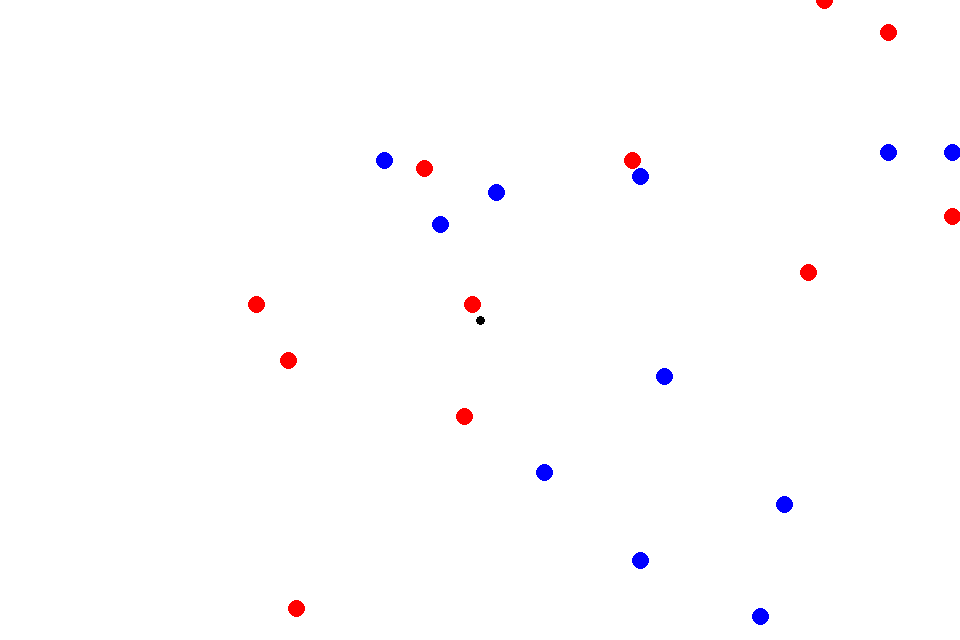

Falhou ao tentar roubar bola
left_team player_0 move from ([59. 38.]) to ([61.7 38. ]) Indexes(0, 0)
@@@@@@@@ Aconteceu kickoff @@@@@@@@
Trocou time


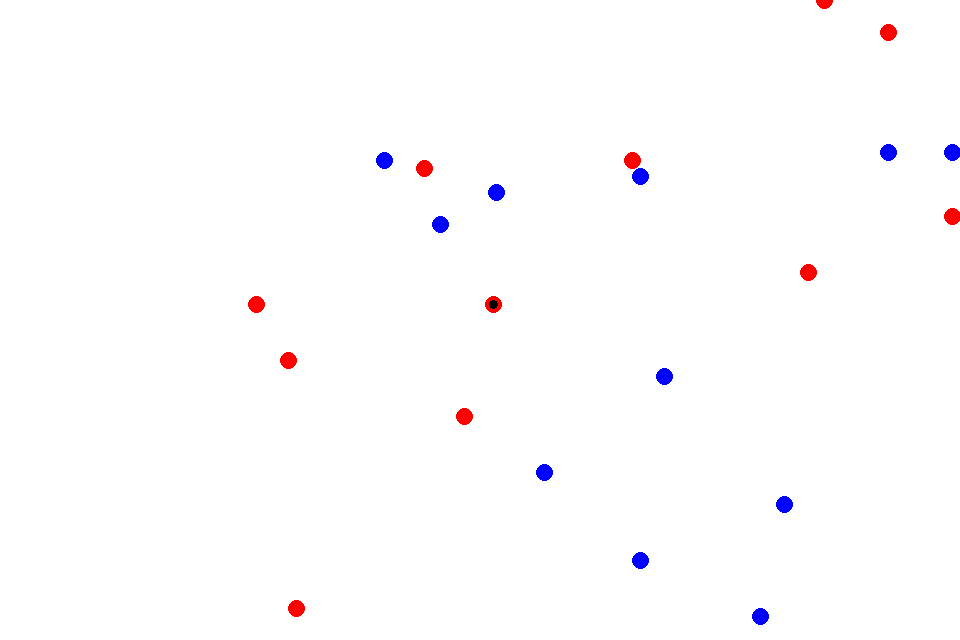

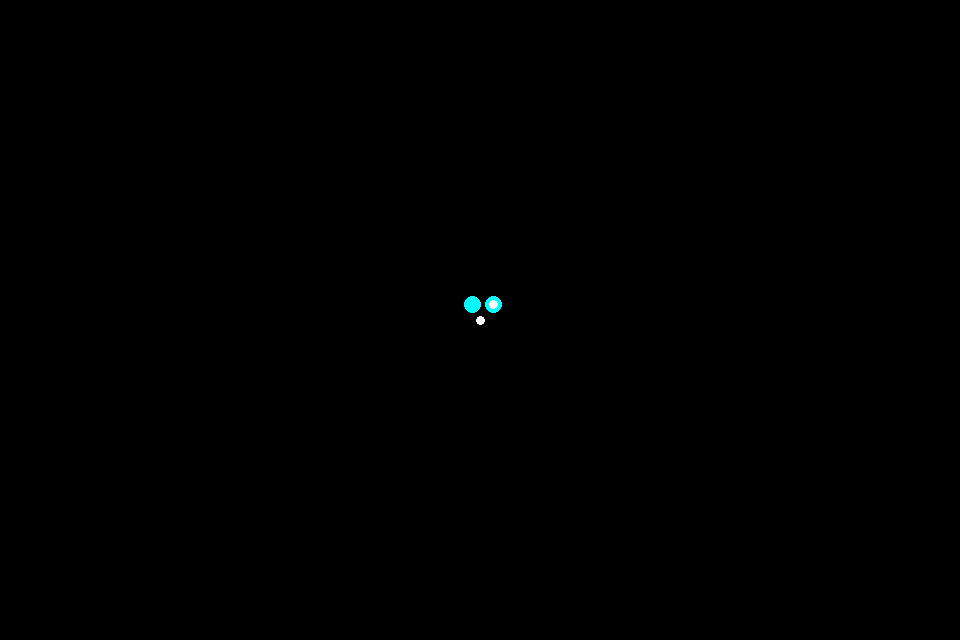

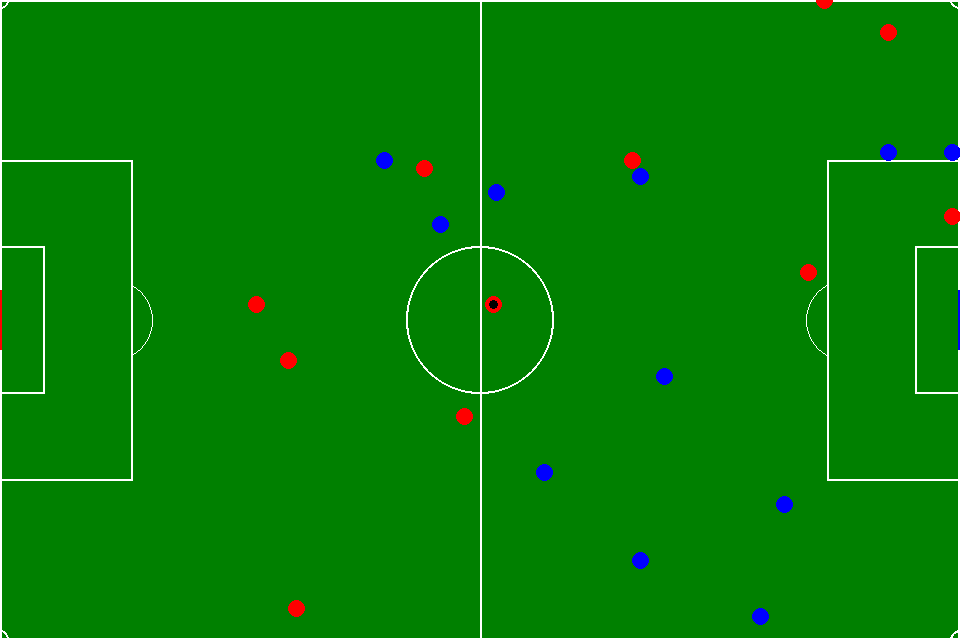

In [10]:
import gymnasium as gym
import env
import numpy as np
from IPython.display import Image, display
from PIL import Image, ImageChops 


#env = gym.make("Soccer-v0", render_mode="human", observation_format="dict")

env = gym.make("Soccer-v0")

obs, _  = env.reset()
image1 = obs
obs = np.array(obs, dtype=np.uint8)
image = Image.fromarray(obs)
display(image)

#print(obs)

obs, _,_,_, _ = env.step(0)
image2 = obs
obs = np.array(obs, dtype=np.uint8)
image = Image.fromarray(obs)
display(image)



diff = ImageChops.difference(image2, image1)
display(diff)
env.render()


Tentou roubar bola
player_0 Roubou a bola de player_11


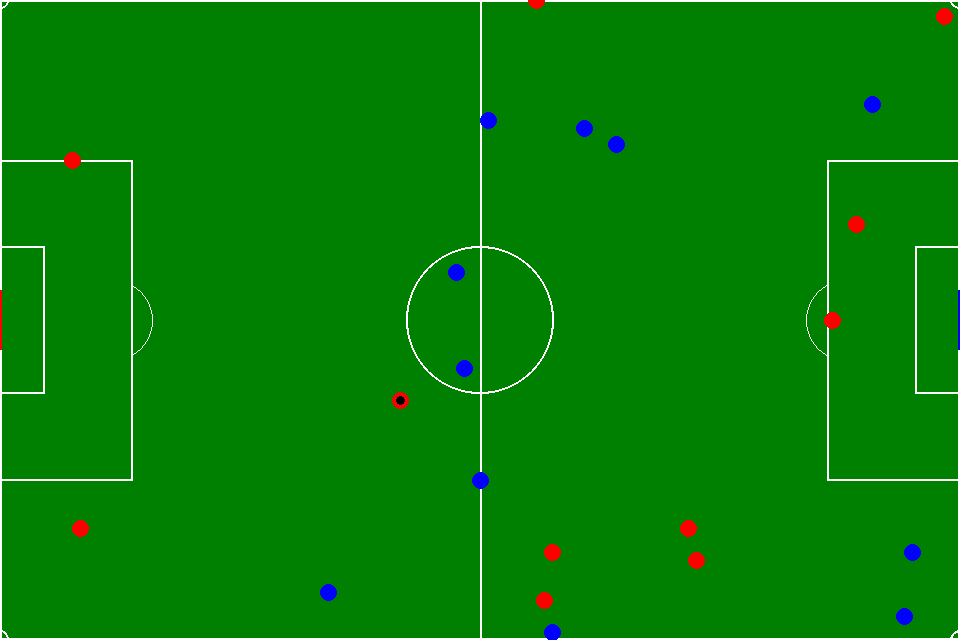

In [20]:
import gymnasium as gym
import env
# Exemplo para Ação 8 (Roubo de Bola)
env = gym.make("Soccer-v0")
obs, _ = env.reset()

# Configurar posições iniciais
env.all_coordinates[0] = [50, 50]  # Posição de um jogador
env.all_coordinates[11] = [60, 60]  # Posição de outro jogador
env.all_coordinates[-1] = [60, 60]  # Posição inicial da bola
# Executar a ação de roubo de bola (ação 8)
obs, _, _, _, _ = env.step(8)
env.render()

In [2]:
pip install pettingzoo

  Obtaining dependency information for pettingzoo from https://files.pythonhosted.org/packages/5f/6c/b787bf60fdc68f465fea3c3083d0ebaae2db823158479e73fc58b227b3e5/pettingzoo-1.24.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/846.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/846.8 kB ? eta -:--:--
   - ------------------------------------- 30.7/846.8 kB 640.0 kB/s eta 0:00:02
   ---- ---------------------------------- 92.2/846.8 kB 871.5 kB/s eta 0:00:01
   ------------ --------------------------- 256.0/846.8 kB 1.7 MB/s eta 0:00:01
   ----------------------- ---------------- 491.5/846.8 kB 2.6 MB/s eta 0:00:01
   ----------------------------------- ---- 757.8/846.8 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 846.8/846.8 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


left_team player_0 move from ([50. 50.]) to ([52.7 50. ]) Indexes(0, 0)


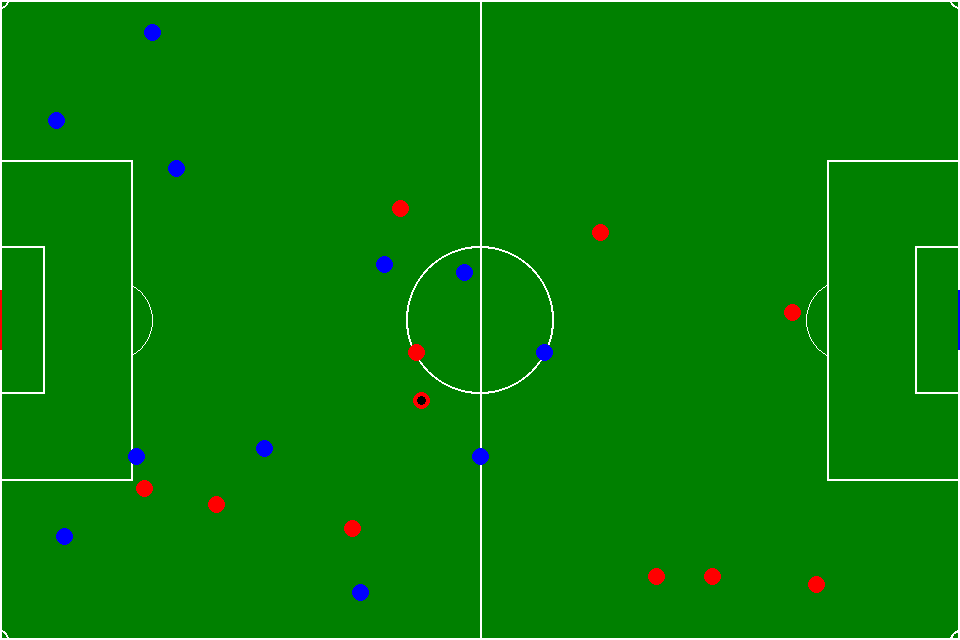

In [6]:
import gymnasium as gym
import env
import numpy as np
from IPython.display import Image, display
from PIL import Image, ImageChops 
# Exemplo para Ações Especiais (9, 10, 11)
env = gym.make("Soccer-v0")
obs, _ = env.reset()

# Configurar posições iniciais
env.all_coordinates[0] = [50, 50]  # Posição de um jogador
env.all_coordinates[-1] = [50, 50]  # Posição inicial da bola
env.step((0,0))
env.render()


In [2]:
import gymnasium as gym
import env
import numpy as np
from IPython.display import Image, display
from PIL import Image, ImageChops 
# Exemplo para Ações Especiais (9, 10, 11)
env = gym.make("Soccer-v0")
obs, _ = env.reset()

# Configurar posições iniciais
#env.all_coordinates[0] = [0, 30]  # Posição de um jogador
#env.all_coordinates[1] = [53, 50]  # Posição de um jogador
env.all_coordinates[-1] = [0, 30]  # Posição inicial da bola
env.step((0,2))
env.render()


c:\Users\Juan\anaconda3\envs\rlx\lib\site-packages\gymnasium\utils\passive_env_checker.py:29: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: float32. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(


TypeError: __draw_players() missing 2 required positional arguments: 'player_left_color' and 'player_right_color'

c:\Users\Juan\anaconda3\envs\rlx\lib\site-packages\gymnasium\utils\passive_env_checker.py:160: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'PIL.Image.Image'>
  logger.warn(
c:\Users\Juan\anaconda3\envs\rlx\lib\site-packages\gymnasium\utils\passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


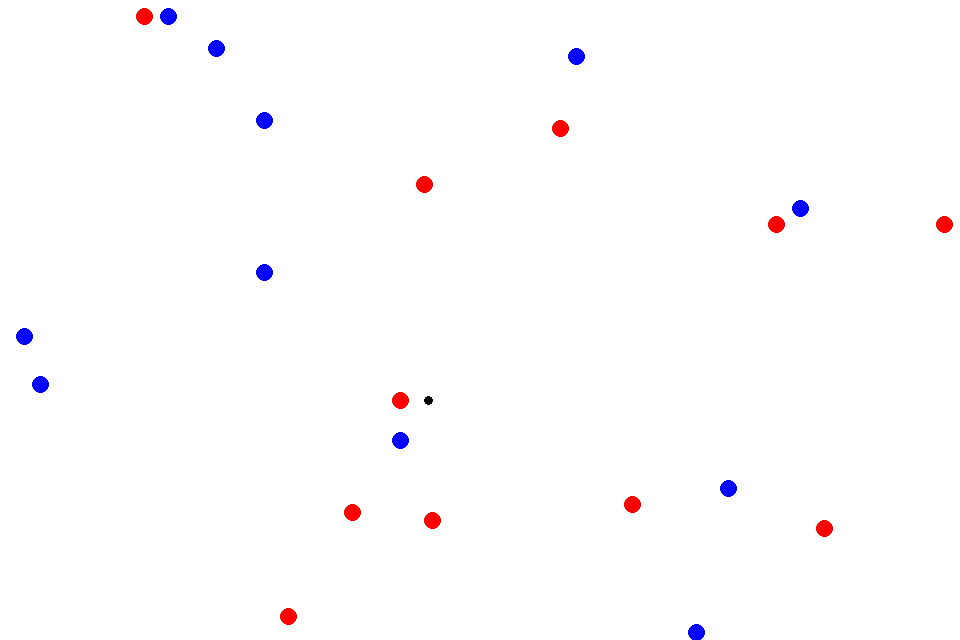

In [2]:
obs, _,_,_, _ = env.step(11)
image2 = obs
obs = np.array(obs, dtype=np.uint8)
image = Image.fromarray(obs)
display(image)

In [1]:
import os
import gymnasium as gym
import env
import random
import numpy as np
from PIL import Image, ImageDraw
from PIL.Image import Image as ImageType

""" Esse arquivo serve para debugar o SoccerEnv.

[1] Definir uma sequência de ações;
[2] Rodar uma sequencia de ações;
[3] Cria uma pasta para salvar as imagens e garante que a pasta esteja vazia;
[4] Salvar na pasta as imagens de cada estado do SoccerEnv;
[5] Inspecionar manualmente cada imagem para verificar se o ambiente executou a sequência corretamente.

=------------------=
A 'action' passada para o 'step' é uma dupla contendo a direção do movimento e a ação.

# posição 0: direção do movimento (de 0 até 8)
# posição 1: ação (de 0 (andar) até 4)
"""

# [1] Definir uma sequência de ações;
# actions = [(0,0)]*5 + [(8,0)] # OK
# actions = [(0,0)]*5 + [(7,0)] # OK
# actions = [(0,0)]*5 + [(6,0)] # OK
# actions = [(0,0)]*5 + [(5,0)] # OK
# actions = [(0,0)]*5 + [(4,0)] # OK
# actions = [(0,0)]*5 + [(3,0)] # OK
# actions = [(0,0)]*5 + [(2,0)] # OK
# actions = [(0,0)]*5 + [(1,0)]*1 # OK
# actions = [(0,0)]*5 + [(0,0)]*1 # OK
actions = [(3,0)]*15 + [(0,0)]*17 + [(0,0)]*2 # OK

# [2] Rodar uma sequencia de ações;
env = gym.make("Soccer-v0", render_mode="human", observation_format='dict', color_option=2)
env.reset()
initial_image = env.render()
images: list[ImageType] = [initial_image]
for action in actions:
  env.step(action)
  images.append(env.render())

# [3] Cria uma pasta para salvar as imagens e garante que a pasta esteja vazia;
output_folder = "./teste_imgs"
if not os.path.exists(output_folder):
  # Cria a pasta caso não exista
  os.makedirs(output_folder)
else:
  # Remove todas as imagens existentes na pasta
  existing_files = [f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))]
  for file in existing_files:
    os.remove(os.path.join(output_folder, file))
  
# [4] Salvar numa pasta a imagem de cada estado do SoccerEnv;
for i, image in enumerate(images):
  image.save(os.path.join(output_folder, f'image_{i+1}.png'))

print("✅ Successfully run. Remember to look warnings and PRINTS BETWEEN WARNINGS.")

c:\Users\Juan\anaconda3\envs\rlx\lib\site-packages\gymnasium\utils\passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


left_team player_1 move from ([48. 40.]) to ([48.  42.7]) Indexes(1, 2)


c:\Users\Juan\anaconda3\envs\rlx\lib\site-packages\gymnasium\utils\passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


left_team player_1 move from ([48.  42.7]) to ([48.  45.4]) Indexes(1, 2)
left_team player_1 move from ([48.  45.4]) to ([48.  48.1]) Indexes(1, 2)
left_team player_1 move from ([48.  48.1]) to ([48.  50.8]) Indexes(1, 2)
left_team player_1 move from ([48.  50.8]) to ([48.  53.5]) Indexes(1, 2)
left_team player_1 move from ([48.  53.5]) to ([48.  56.2]) Indexes(1, 2)
left_team player_1 move from ([48.  56.2]) to ([48.  58.9]) Indexes(1, 2)
left_team player_1 move from ([48.  58.9]) to ([48.  61.6]) Indexes(1, 2)
left_team player_1 move from ([48.  61.6]) to ([48.  64.3]) Indexes(1, 2)
left_team player_1 move from ([48.  64.3]) to ([48. 67.]) Indexes(1, 2)
left_team player_1 move from ([48. 67.]) to ([48.  69.7]) Indexes(1, 2)
left_team player_1 move from ([48.  69.7]) to ([48.  72.4]) Indexes(1, 2)
left_team player_1 move from ([48.  72.4]) to ([48.  75.1]) Indexes(1, 2)
left_team player_1 move from ([48.  75.1]) to ([48.  77.8]) Indexes(1, 2)
left_team player_1 move from ([48.  77.8])

KeyboardInterrupt: 